# Project: Investigate a Dataset (Patients noshow appointments may2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srb
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

we load the data check for any faults or ambiguity and clea

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
print(df.shape)
df.head()

(110527, 14)


PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

data consists of  110527 row and 14 columns 

In [3]:
df["PatientId"].nunique()

62299

there are only 62299 unique patients

In [4]:
df["PatientId"].duplicated().sum()

48228

there are 48228 duplicate patient ids

In [5]:
df.duplicated(["PatientId","No-show"]).sum()

38710

there are 38710 no show repeating patients

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning (Replace this with more specific notes!)
In this section we will try to simplify the data and get rid of useless info
and clean the wrong data entered


In [7]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

the minimum age is -1 which is not real data so we will need to get rid of it

In [8]:
df.query("Age==-1")

PatientId  AppointmentID Gender          ScheduledDay  \
99832  4.659432e+14        5775010      F  2016-06-06T08:58:13Z   

             AppointmentDay  Age Neighbourhood  Scholarship  Hipertension  \
99832  2016-06-06T00:00:00Z   -1         ROMÃO            0             0   

       Diabetes  Alcoholism  Handcap  SMS_received No-show  
99832         0           0        0             0      No

In [9]:
df.drop(index=99832,inplace=True)

In [10]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105260e+05   1.105260e+05  110526.000000  110526.000000   
mean   1.474934e+14   5.675304e+06      37.089219       0.098266   
std    2.560943e+14   7.129544e+04      23.110026       0.297676   
min    3.921784e+04   5.030230e+06       0.000000       0.000000   
25%    4.172536e+12   5.640285e+06      18.000000       0.000000   
50%    3.173184e+13   5.680572e+06      37.000000       0.000000   
75%    9.438963e+13   5.725523e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110526.000000  110526.000000  110526.000000  110526.000000   
mean        0.197248       0.071865       0.030400       0.022248   
std         0.397923       0.258266       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110526.000000  
mean        0.321029  
std         0.466874  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [11]:
#renaming column names
df.rename(columns={"Hipertension":"Hypertension","Handcap":"handicapped","No-show":"no_show"},inplace=True)

In [12]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  handicapped  SMS_received no_show  
0         0           0            0             0      No  
1         0           0            0             0      No  
2         0           0            0             0      No  
3         0           0            0             0      No  
4         1           0            0             0      No

In [13]:
#removing duplicates
df.drop_duplicates(["PatientId","no_show"],inplace=True)

In [14]:
print(df.shape)
#the appointment id  and schedule day and appointment day columns are not needed in this analysis so i will remove them
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"],axis=1,inplace=True)

(71816, 14)


In [15]:
df.head()

Gender  Age      Neighbourhood  Scholarship  Hypertension  Diabetes  \
0      F   62    JARDIM DA PENHA            0             1         0   
1      M   56    JARDIM DA PENHA            0             0         0   
2      F   62      MATA DA PRAIA            0             0         0   
3      F    8  PONTAL DE CAMBURI            0             0         0   
4      F   56    JARDIM DA PENHA            0             1         1   

   Alcoholism  handicapped  SMS_received no_show  
0           0            0             0      No  
1           0            0             0      No  
2           0            0             0      No  
3           0            0             0      No  
4           0            0             0      No

<a id='eda'></a>
## Exploratory Data Analysis

Now that we have trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### General Look

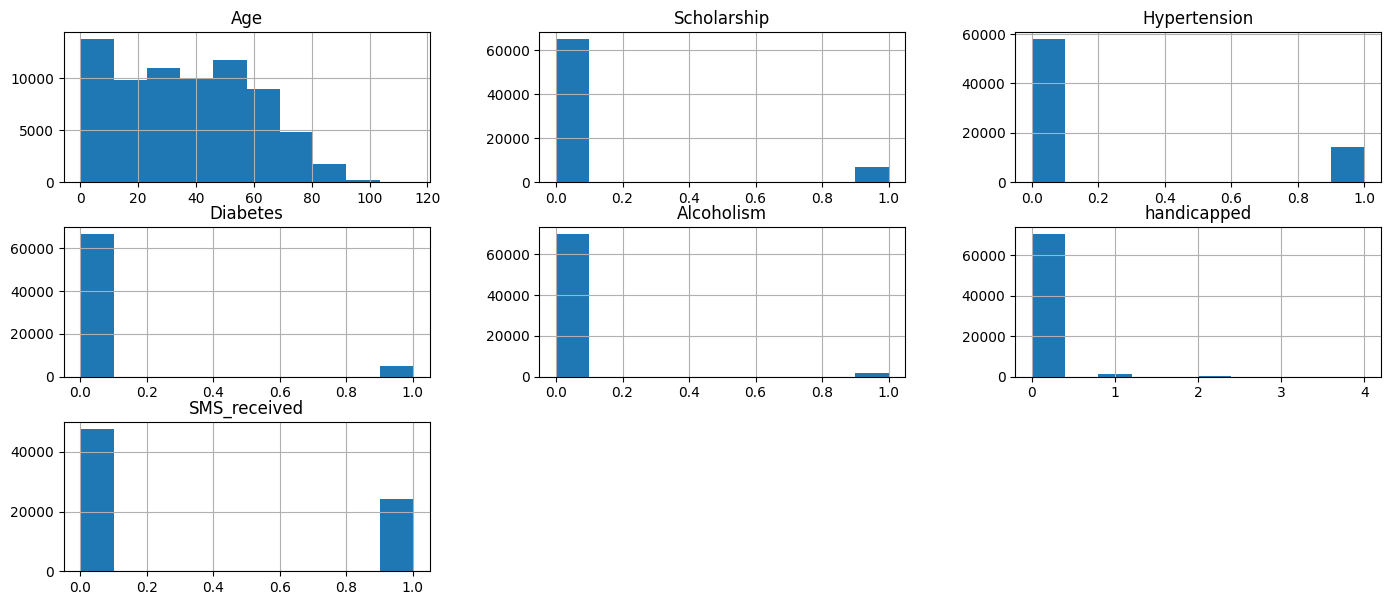

In [16]:
df.iloc[:,1:].hist(figsize=(17,7));

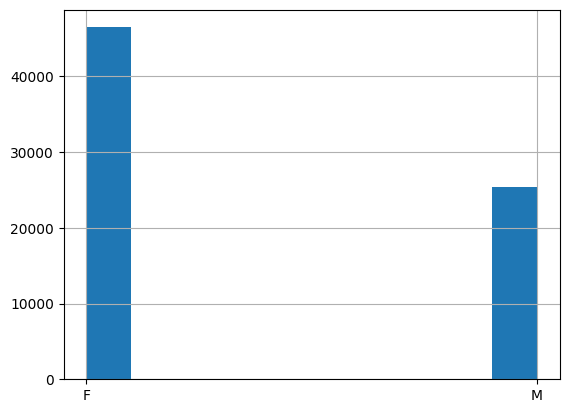

In [17]:
df["Gender"].hist();

from the graphs above we can see that the majority of the patients are females. also most of the patients are 40 years or younger don't have diabetes or a scholarship and are not handicapped

In [18]:
# to categorize the data into show and no show patients we do the following
show = df.no_show=="No"
noshow = df.no_show=="Yes"
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 handicapped      54153
 SMS_received     54153
 no_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 handicapped      17663
 SMS_received     17663
 no_show          17663
 dtype: int64)

### investigation of the influencing factors on the attendance rate

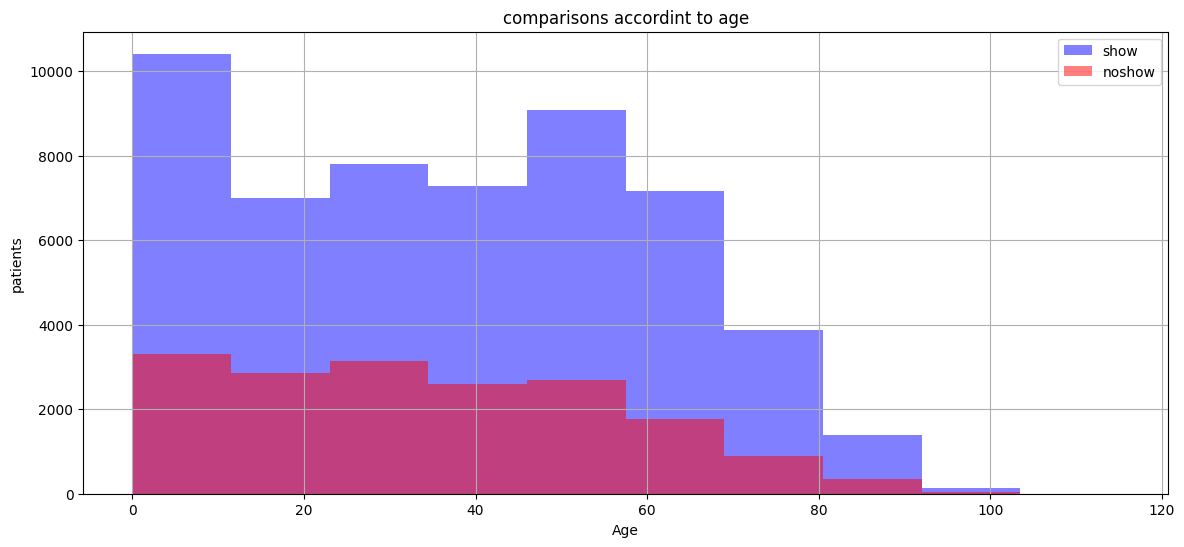

In [19]:
plt.figure(figsize=(14,6))
df["Age"][show].hist(alpha=.5,bins = 10,color="blue",label="show")
df["Age"][noshow].hist(alpha=.5,bins = 10,color="red",label="noshow")
plt.legend();
plt.title("comparisons accordint to age");
plt.xlabel("Age");
plt.ylabel("patients");


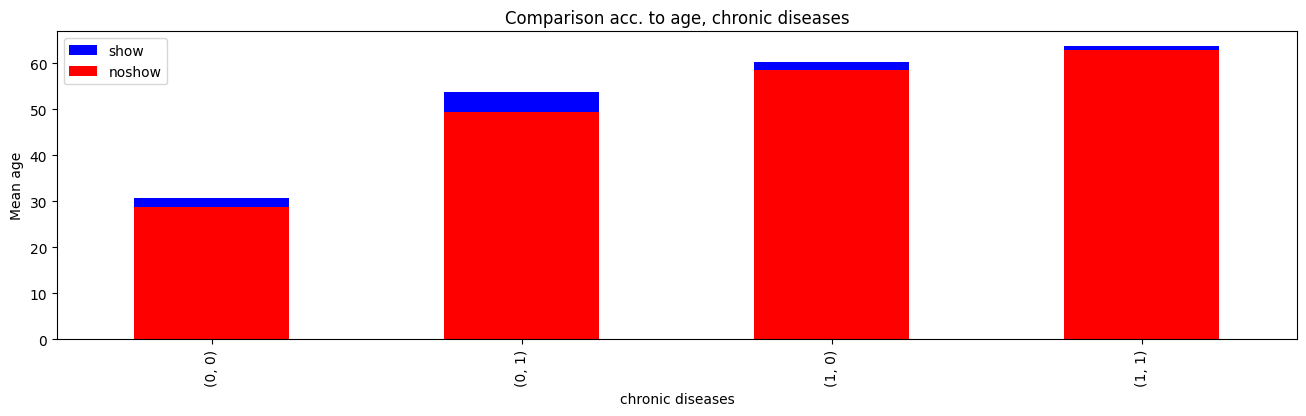

In [20]:
plt.figure(figsize=[16,4]);
df[show].groupby(["Hypertension","Diabetes"]).mean(numeric_only=True)["Age"].plot(kind="bar",color="blue",label="show");
df[noshow].groupby(["Hypertension","Diabetes"]).mean(numeric_only=True)["Age"].plot(kind="bar",color="red",label="noshow");
plt.legend();
plt.title("Comparison acc. to age, chronic diseases");
plt.xlabel("chronic diseases");
plt.ylabel("Mean age");

In [21]:
df[show].groupby(["Hypertension","Diabetes"]).mean(numeric_only=True)["Age"],df[noshow].groupby(["Hypertension","Diabetes"]).mean(numeric_only=True)["Age"]

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

as we can see the average ages for patients:

  - who dont have hypertension and dont have diabetes is 30 for those who come on time and 29 for those who dont come

  - who dont have hypertension but have diabetes is 53 for those whocome on time and 49 for those who dont come

  - who have hypertension and dont have diabetes is 60 for those who come on time and 58 for those who dont come

  - who have hypertension and  have diabetes is 63 for those who come on time and 63 for those who dont come

in the end this shows that diabetes and hypertension has no correlation beteween it and showing or no showing to the appointment


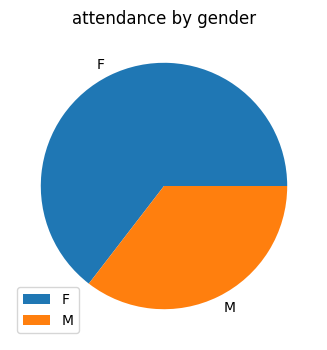

In [22]:
# what is the percentage of the genders attending
plt.figure(figsize=[16,4])
df["Gender"][show].value_counts(normalize=True).plot(kind="pie",label="");
plt.legend();
plt.title("attendance by gender");


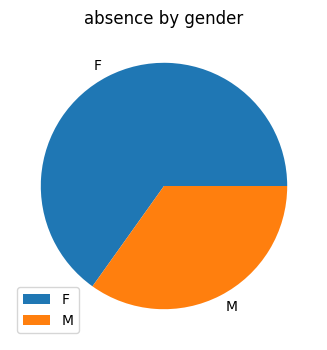

In [23]:
# what is the percentage of the genders missing
plt.figure(figsize=[16,4])
df["Gender"][noshow].value_counts(normalize=True).plot(kind="pie",label="");
plt.legend();
plt.title("absence by gender");

we realise from the above graphs that the gender alone doesnt make a difference in attendance or absence

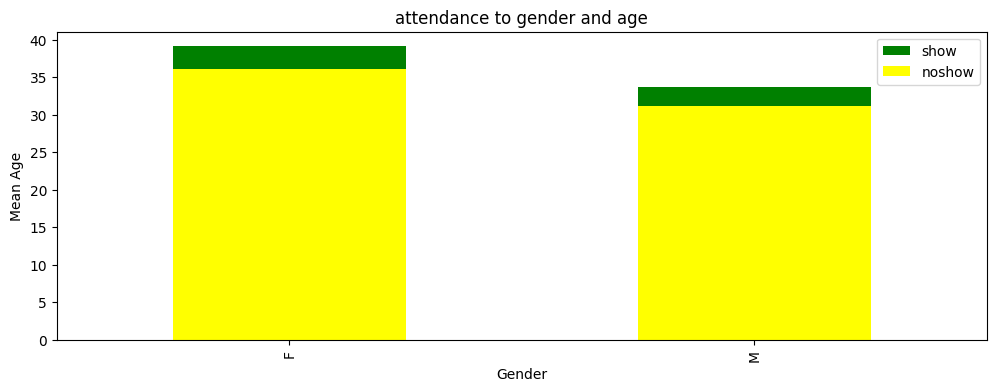

In [24]:
plt.figure(figsize=(12,4))
df[show].groupby("Gender").Age.mean().plot(kind="bar",color="green",label="show")
df[noshow].groupby("Gender").Age.mean().plot(kind="bar",color="yellow",label="noshow")
plt.legend();
plt.title("attendance to gender and age");
plt.xlabel("Gender");
plt.ylabel("Mean Age");

from this graph we conclude that there is no correlation between gender and attendance

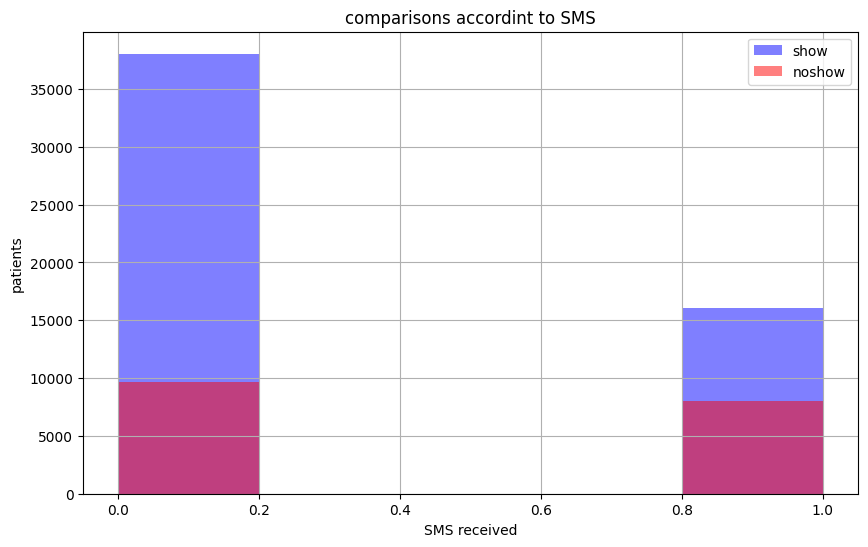

In [25]:
plt.figure(figsize=(10,6))
df["SMS_received"][show].hist(alpha=.5,bins = 5,color="blue",label="show")
df["SMS_received"][noshow].hist(alpha=.5,bins = 5,color="red",label="noshow")
plt.legend();
plt.title("comparisons accordint to SMS");
plt.xlabel("SMS received");
plt.ylabel("patients");

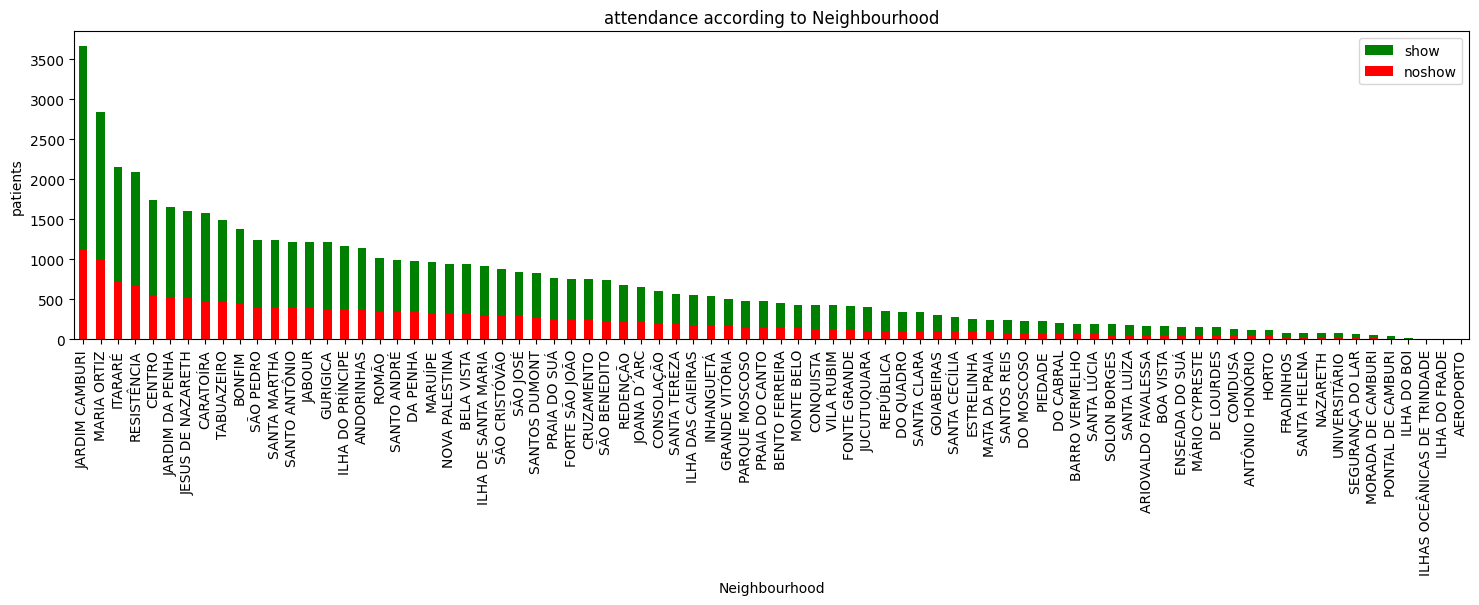

In [26]:
plt.figure(figsize=(18,4))
df.Neighbourhood[show].value_counts().plot(kind="bar",color ="green",label="show")
df.Neighbourhood[noshow].value_counts().plot(kind="bar",color ="red",label="noshow")
plt.legend();
plt.title("attendance according to Neighbourhood");
plt.xlabel("Neighbourhood");
plt.ylabel("patients");

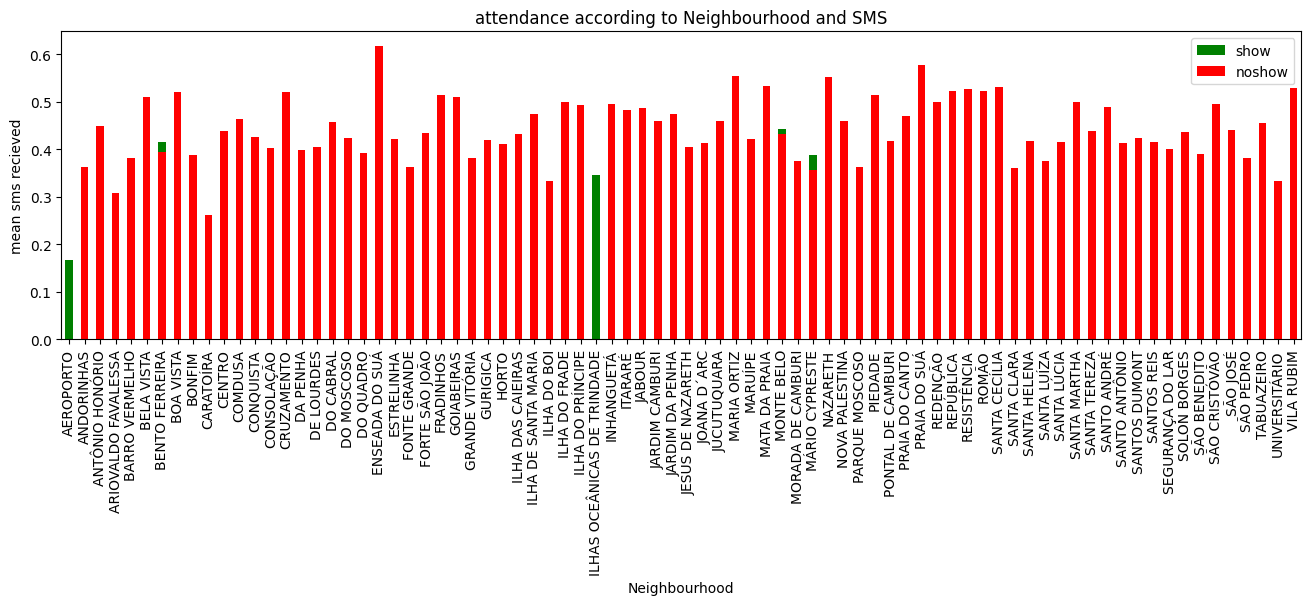

In [27]:
plt.figure(figsize=(16,4))
df[show].groupby("Neighbourhood").SMS_received.mean().plot(kind="bar",color="green",label="show")
df[noshow].groupby("Neighbourhood").SMS_received.mean().plot(kind="bar",color="red",label="noshow")
plt.legend()
plt.title("attendance according to Neighbourhood and SMS")
plt.xlabel("Neighbourhood")
plt.ylabel("mean sms recieved");

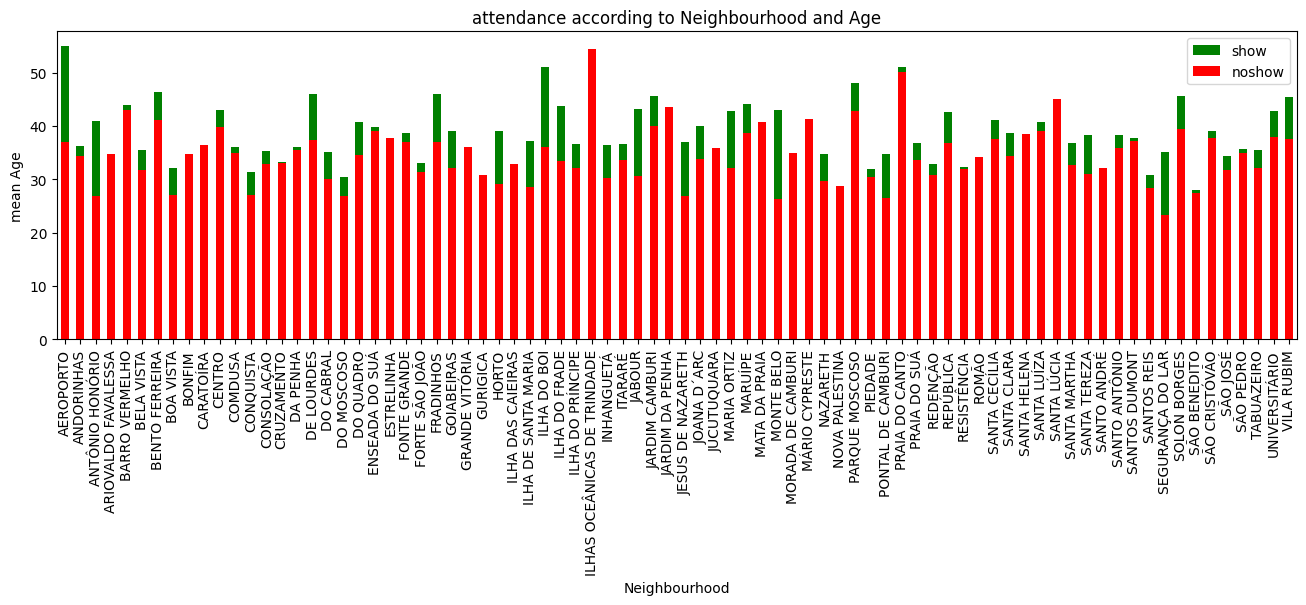

In [28]:
plt.figure(figsize=(16,4))
df[show].groupby("Neighbourhood").Age.mean().plot(kind="bar",color="green",label="show")
df[noshow].groupby("Neighbourhood").Age.mean().plot(kind="bar",color="red",label="noshow")
plt.legend()
plt.title("attendance according to Neighbourhood and Age")
plt.xlabel("Neighbourhood")
plt.ylabel("mean Age");

<a id='conclusions'></a>
## Conclusions

neighbourhood has a great effect on attendence or not ,JARDIM CAMBURI has the greatest number of patients and also has the greates showing rate

number of showing patients from neighbourhood is greatly affected by recieving SMS and Ages

Age has a clear inluence on the showing rate Ages from 0:8 are the most showing more than the 45:55 age span and the least attending ages are those of 65 years old or older

Number of showing patients without recieving sms is greater than showing patients with recieving sms , which mean that we need to revisit our sms campaign 